MovieWriter imagemagick unavailable; using Pillow instead.


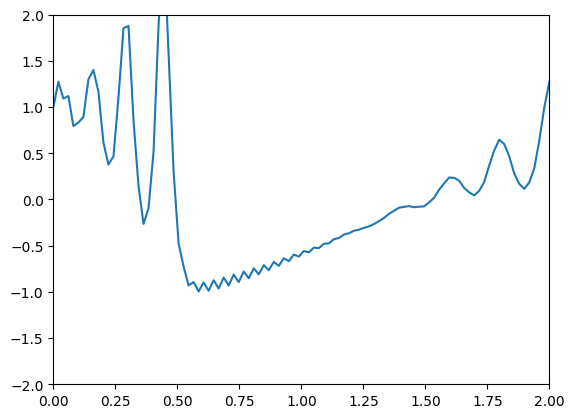

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


alpha = 0.022
longitud = 2.0
tiempo = 10.0
num_puntos = 100
num_tiempos = 1000
dx = longitud / num_puntos
#dt = tiempo / (num_tiempos - 1)
dt = 0.001
num_pasos = int(tiempo / dt)

x = np.linspace(0, longitud, num_puntos)
phi = np.cos(np.pi * x) #condición inicial
phi_viejo = np.copy(phi)

def frontera_periodica(phi):
    phi[0] = phi[-2]
    phi[-1] = phi[1]
    return phi

def evolucion_phi(phi, phi_viejo, dx, dt, alpha):
    phi_nuevo = np.copy(phi)
    for i in range(1, len(phi) - 2):
        #phi_nuevo[i] = -(phi[i] * dt * (phi[i + 1] - phi[i]) / dx) - alpha**2 * dt * (phi[i - 2] + phi[i - 1] - 3*phi[i] + phi[i + 1]) / dx**3

        phi_nuevo[i] = phi_viejo[i] - dt*(((phi[i+1] + phi[i] + phi[i-1]) * (phi[i+1] - phi[i-1]) / (3 * dx)) + alpha**2*((phi[i+2] - 2*phi[i+1] + 2*phi[i-1] - phi[i-2]) / (dx**3)))
    phi_nuevo = frontera_periodica(phi_nuevo)
    return phi_nuevo

"""
phis = [phi]
for t in range(num_tiempos):
    phi = evolucion_phi(phi, phi_viejo, dx, dt, alpha)  # Actualizar phi con el nuevo estado
    phis.append(np.copy(phi))  # Asegurarse de copiar phi para evitar referencias"""


fig, ax = plt.subplots()
ax.set_xlim(0, longitud)
ax.set_ylim(-2, 2)
line, = ax.plot(x, phi)

def animate(i):
    global phi, phi_viejo
    phi_siguiente = evolucion_phi(phi, phi_viejo, dx, dt, alpha)
    phi_viejo = np.copy(phi)
    phi = np.copy(phi_siguiente)
    line.set_ydata(phi)
    return line,


ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)
ani.save('3.1.simulacion.gif', writer='imagemagick', fps=30)
plt.show()